In [1]:
import msptools as msp
import numpy as np

In [ ]:
number_of_particles = 200
dimensions = 3  # Assuming 3D space for the dipole moments
particle_positions = (np.random.rand(number_of_particles, dimensions) - 0.5) *10  # Random positions in a unit cube centered at the origin
polarizability = 2.313 + 1.86j
wave_number = 1.570796

time_step = 0.01  # Example time step, not used in this test
num_steps = 3000  # Example number of steps, not used in this test
sampling_steps = 10
temperature = 0.3
mobility = 1.0  # Example mobility, not used in this test
field_module = 2

trajectories = np.zeros((num_steps // sampling_steps, number_of_particles, dimensions))

def incident_electric_field(particle_positions):
    k = wave_number  # Use the defined wave number
    return np.array([[0, 0, np.cos(k * pos[0])] for pos in particle_positions]) * field_module

def incident_field_gradient(particle_positions):
    k = wave_number  # Use the defined wave number
    return np.array([[[0, 0, -k * np.sin(k * pos[0])],[0,0,0], [0,0,0]] for pos in particle_positions]) * field_module

def brownian_displacement(mobility, temperature, time_step):
    return np.random.normal(0, np.sqrt(2 * mobility * temperature * time_step), size=(number_of_particles, dimensions))

for i in range(num_steps):

    incident_field = incident_electric_field(particle_positions)
    incident_gradient = incident_field_gradient(particle_positions)

    dipole_moments = msp.dipole_moments.calculate_dipole_moments_linear(
        polarizability,
        incident_field)

    optical_forces = msp.OFO_calculations.calculate_forces(
        1.0,
        dipole_moments,
        incident_gradient)

    particle_positions += mobility * optical_forces * time_step + brownian_displacement(mobility, temperature, time_step)

    if i % sampling_steps == 0:
        trajectories[i // sampling_steps] = particle_positions

# Save the trajectories to a file
#np.save("trajectories.npy", trajectories)




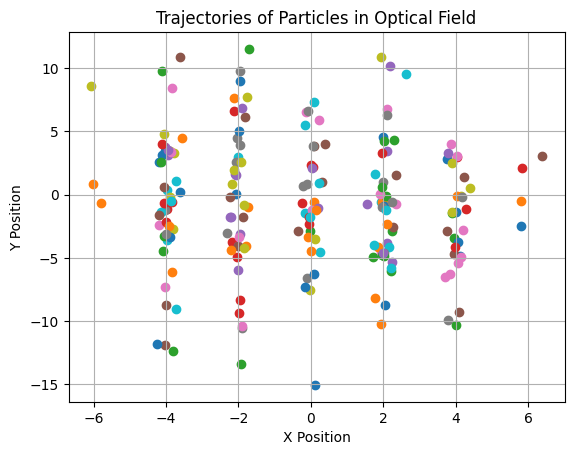

In [13]:
import matplotlib.pyplot as plt

# Plotting the trajectories of the particles
fig = plt.figure()
for i in range(number_of_particles):
    plt.scatter(trajectories[-1, i, 0], trajectories[-1, i, 1], label=f'Particle {i+1}')


plt.title('Trajectories of Particles in Optical Field')
plt.xlabel('X Position')
plt.ylabel('Y Position') 
plt.grid()
plt.show()
